## **Importing Libraries:**

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install calplot

# **Importing Dataset:**

In [ ]:
data = pd.read_csv('/content/gold_price_data.csv')
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data between 2015 and 2020 (inclusive)
df = data[(data['Date'].dt.year >= 2015) & (data['Date'].dt.year <= 2020)]

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort the DataFrame by date
df.sort_index(inplace=True)

df

,Value
Date,
2015-01-01,1206.00
2015-01-02,1172.00
2015-01-05,1200.00
2015-01-06,1210.25
2015-01-07,1210.50
...,...
2020-03-09,1672.50
2020-03-10,1655.70
2020-03-11,1653.75


# **Summary Statistics:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1357 entries, 2015-01-01 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1357 non-null   float64
dtypes: float64(1)
memory usage: 21.2 KB


In [ ]:
df.describe()

,Value
count,1357.000000
mean,1277.797679
std,115.758192
min,1049.400000
25%,1208.200000
50%,1266.250000
75%,1321.500000
max,1683.650000


# **Gold Price Over Time:**

In [ ]:
# Plot the gold price over time
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df.index, y=df['Value'], mode='lines'))
fig.update_layout(title='Gold Price Over Time', xaxis_title='Date', yaxis_title='Price (USD per troy ounce)',template='plotly_white')
fig.show()

# **Checking Null Value:**

In [ ]:
print(df.isnull().sum())

Value    0
dtype: int64


In [ ]:
# Before reindexing
print("Original number of rows:", len(df))

# Create full business day index again
full_idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
print("Number of business days in full index:", len(full_idx))

# Then check how many are missing:
missing_days = set(full_idx) - set(df.index)
print("Number of missing days in original data:", len(missing_days))

Original number of rows: 1357
Number of business days in full index: 1357
Number of missing days in original data: 0


# **Density Plot of Values:**

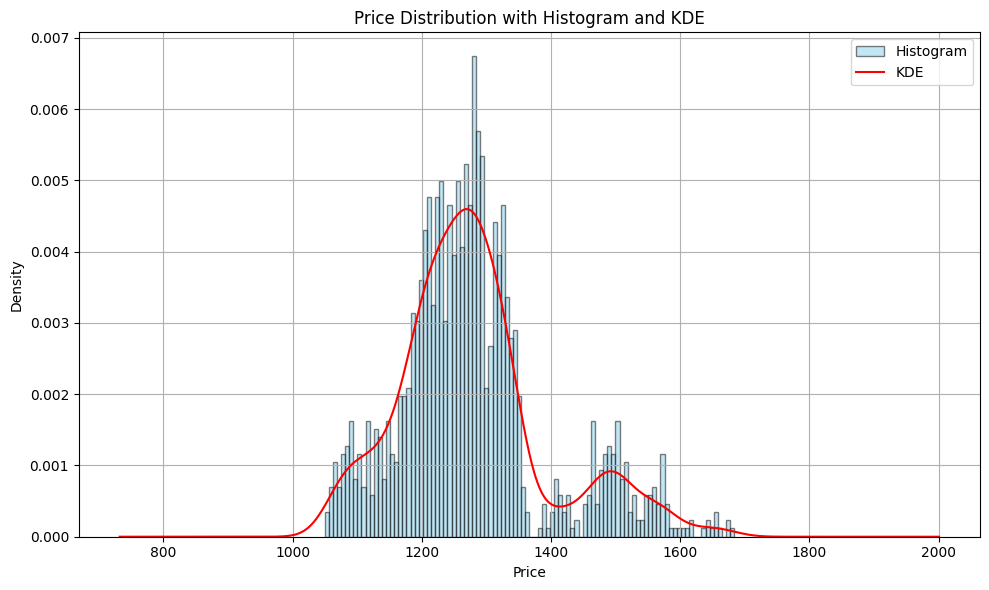

In [ ]:
plt.figure(figsize=(10, 6))
price_data = df['Value']
price_data.plot(kind='hist', bins=100, density=True, alpha=0.5, label='Histogram', color='skyblue', edgecolor='black')
price_data.plot(kind='kde', label='KDE', color='red')

# Add labels and legend
plt.title("Price Distribution with Histogram and KDE")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




1.   2 clusters
2.   reflexive of external market conditions like policy change or significant economic events



# **Boxplot:**

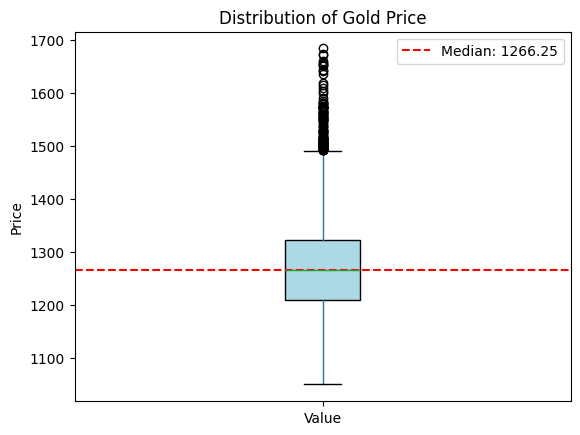

In [ ]:
# Plot the boxplot
box = df.boxplot(column=["Value"], grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Calculate the median
median_value = np.median(df["Value"])

# Add the median as a horizontal line
plt.axhline(median_value, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

# Add labels and title
plt.title("Distribution of Gold Price")
plt.ylabel("Price")
plt.legend()

# Show plot
plt.show()

# **Weekly Gold Price Distribution in Weekdays:**

In [ ]:
df = df.reset_index()
df.head()

,Date,Value
0,2015-01-01,1206.00
1,2015-01-02,1172.00
2,2015-01-05,1200.00
3,2015-01-06,1210.25
4,2015-01-07,1210.50


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df["Weekday"] = df["Date"].dt.weekday
df["Weekday"] = df["Weekday"].map({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})
df.head()

,Date,Value,Day,Month,Year,Weekday
0,2015-01-01,1206.00,1,1,2015,Thursday
1,2015-01-02,1172.00,2,1,2015,Friday
2,2015-01-05,1200.00,5,1,2015,Monday
3,2015-01-06,1210.25,6,1,2015,Tuesday
4,2015-01-07,1210.50,7,1,2015,Wednesday


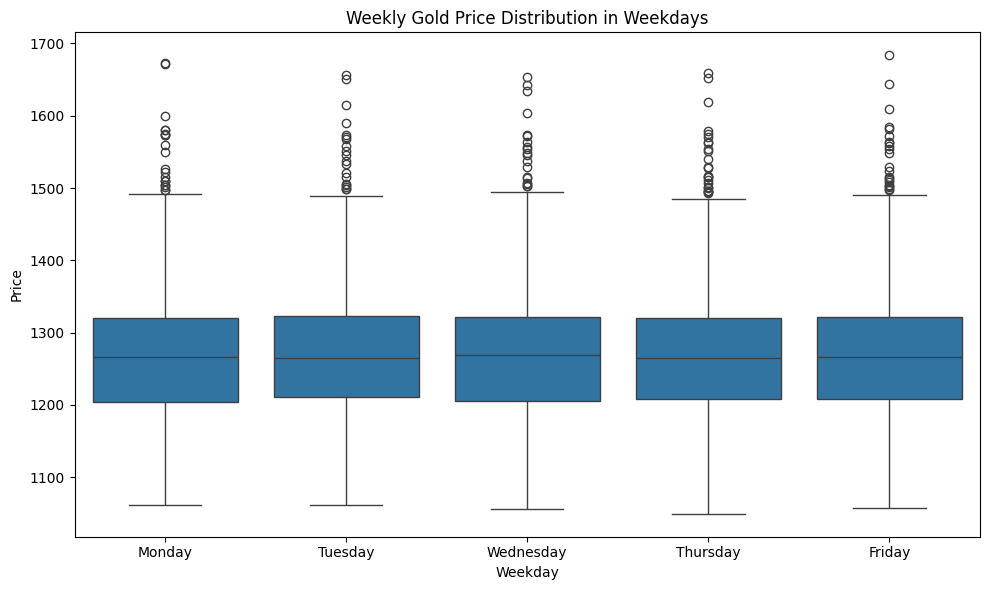

In [ ]:
# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot with proper weekday order and labels
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x="Weekday", y="Value", data=df, order=weekday_order)
plot.set(
    title="Weekly Gold Price Distribution in Weekdays",
    xlabel="Weekday",
    ylabel="Price"
)

plt.tight_layout()
plt.show()




*   more or less no price fluctuation amaong different weekdays
*   No day bias



# **Price Distribution:**

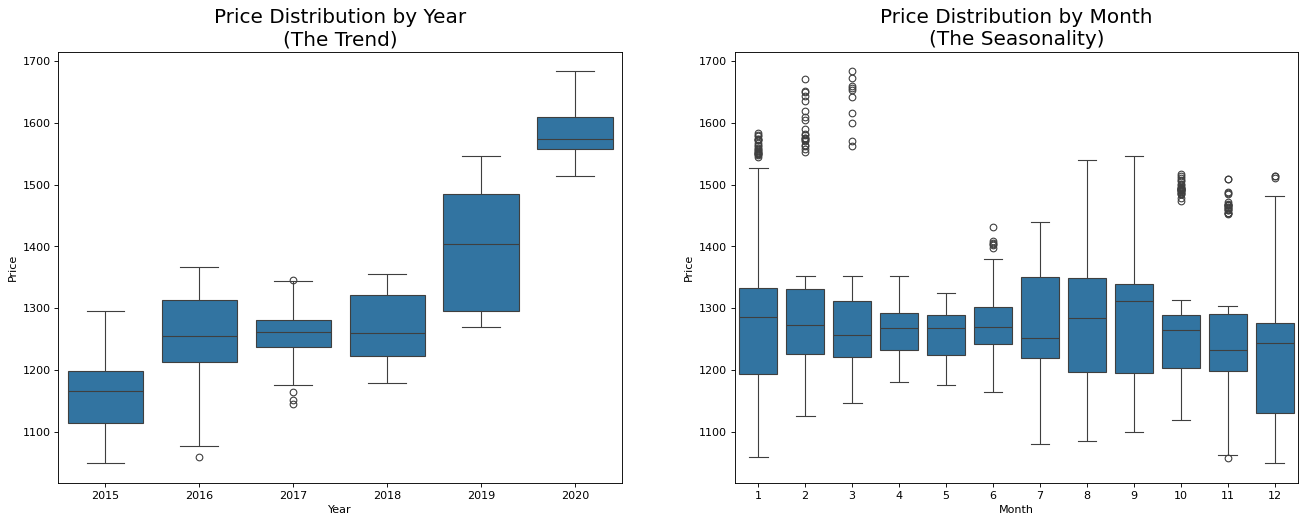

In [ ]:
fig, axes = plt.subplots(1,2,figsize = (20,7),dpi = 80)
sns.boxplot(x = "Year", y = "Value", data = df, ax = axes[0])
sns.boxplot(x = "Month", y = "Value", data = df)

axes[0].set_title("Price Distribution by Year\n(The Trend)",fontsize = 18)
axes[0].set_ylabel("Price")
axes[1].set_title("Price Distribution by Month\n(The Seasonality)",fontsize = 18)
axes[1].set_ylabel("Price")
plt.show()

Durga puja, dhanteras

# **Year-wise Trend Analysis:**

In [ ]:
import plotly.express as px
import statsmodels.api as sm

df['DayOfYear'] = df['Date'].dt.dayofyear

# Group by year and create a separate Plotly figure for each year
for year, group in df.groupby('Year'):
    # Sort by day for consistency
    group = group.sort_values('DayOfYear')

    # Calculate linear trendline using statsmodels
    X = sm.add_constant(group['DayOfYear'])  # Adds intercept term
    model = sm.OLS(group['Value'], X).fit()
    trendline = model.predict(X)

    # Add trendline to DataFrame
    group['Trend'] = trendline

    # Create interactive plot
    fig = px.line(group, x='DayOfYear', y='Value', title=f'Trend for {year}', labels={'DayOfYear': 'Day of Year', 'Value': 'Value'})

    # Add trendline as a separate trace
    fig.add_scatter(x=group['DayOfYear'], y=group['Trend'], mode='lines', name='Trendline', line=dict(color='red', dash='dash'))

    fig.update_layout(
        width=800,
        height=400,
        showlegend=True
    )

    fig.show()

# **Lag Scatter Plot:**

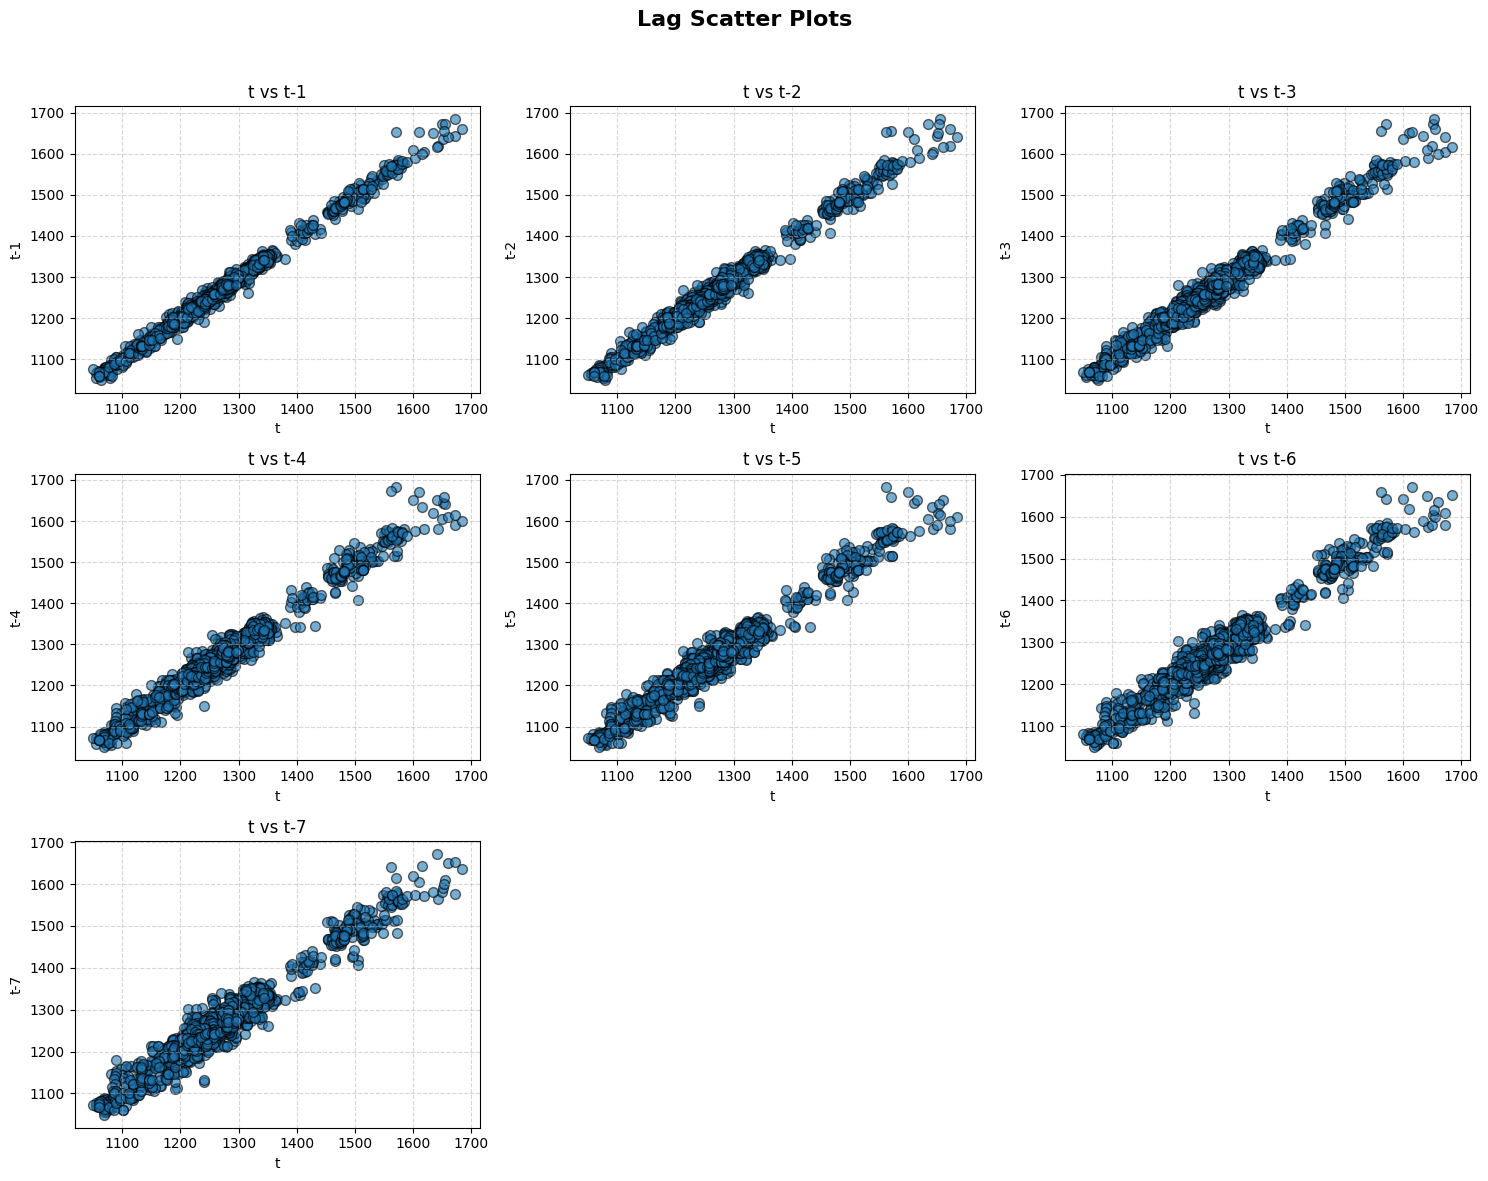

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandas import concat, DataFrame

# Prepare lagged dataframe
values = DataFrame(df['Value'])
lags = 7
columns = [values]

for i in range(1, lags + 1):
    columns.append(values.shift(i))

dataframe = concat(columns, axis=1)
column_names = ['t'] + [f't-{i}' for i in range(1, lags + 1)]
dataframe.columns = column_names
dataframe.dropna(inplace=True)  # Drop rows with NaNs from shifting

# Dynamic subplot layout
n_cols = 3
n_rows = int(np.ceil(lags / n_cols))

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i in range(1, lags + 1):
    ax = plt.subplot(n_rows, n_cols, i)
    ax.scatter(dataframe['t'], dataframe[f't-{i}'], alpha=0.6, edgecolors='k', s=50)
    ax.set_title(f't vs t-{i}', fontsize=12)
    ax.set_xlabel('t', fontsize=10)
    ax.set_ylabel(f't-{i}', fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

plt.suptitle("Lag Scatter Plots", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **7 Day Moving Average:**

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Calculate moving average with a 7-day window
df['MA_7'] = df['Value'].rolling(window=7).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Value'],
    mode='lines',
    name='Original Price',
    line=dict(color='blue'),
    opacity=0.5
))

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['MA_7'],
    mode='lines',
    name='7-Day Moving Average',
    line=dict(color='red', width=3)
))

fig.update_layout(
    title='Price and 7-Day Moving Average',
    xaxis_title='No of Days',
    yaxis_title='Price',
    template='plotly_white',
    hovermode='x unified',
    legend=dict(x=0.01, y=0.99)
)

fig.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
X = df['Value'].values
window = 7
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length - window, length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 17.361


The application of 7 day MA improved the model performance, indicating the presence of high-frequency noise in daily prices.

Based on this, we consider resampling the data to weekly, which retains the core trend while improving stability and model interpretability.

#### The 7-day moving average looks very similar to the original data, resampling weekly is a good alternative to simplify and smooth the data.

# **Autocorrelation of Price:**

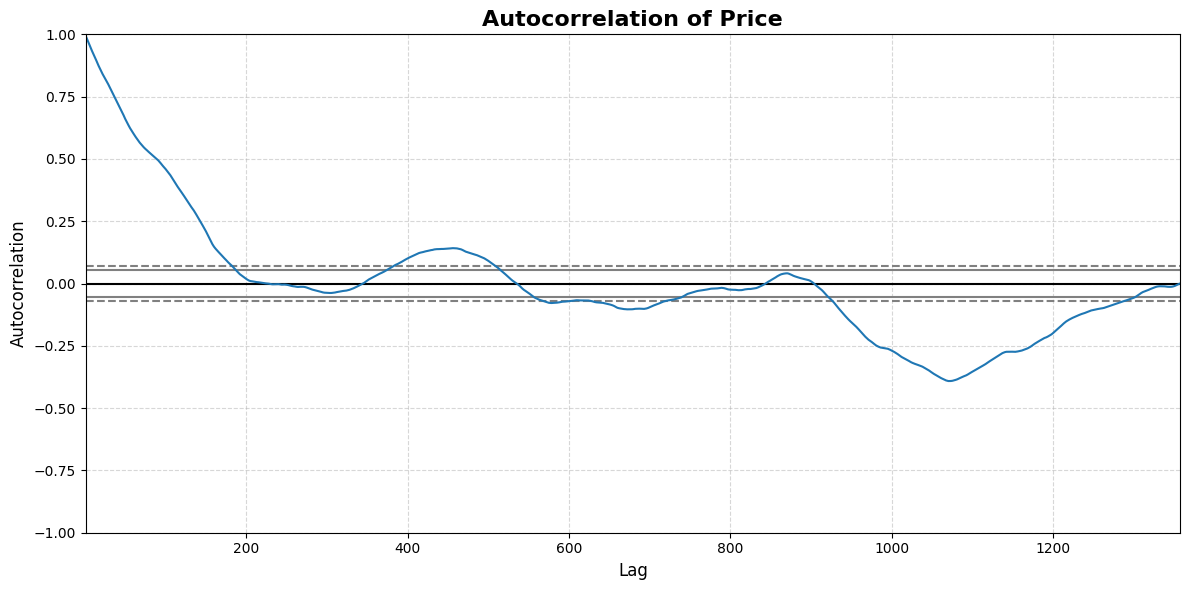

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12, 6))  # Bigger figure for readability
autocorrelation_plot(df['Value'])

plt.title('Autocorrelation of Price', fontsize=16, fontweight='bold')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
#strong signal of autocorrelation
#the price at a given time is highly dependent on its previous values
#time series forecasting models like ARIMA, Exponential Smoothing, or LSTM for prediction.

# **Convert to Weekly Data:**

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df_weekly = df['Value'].resample('W').mean()
df_weekly.head()

,Value
Date,
2015-01-04,1189.00
2015-01-11,1210.80
2015-01-18,1245.90
2015-01-25,1289.30
2015-02-01,1277.35


# **Seasonal Decomposition:**

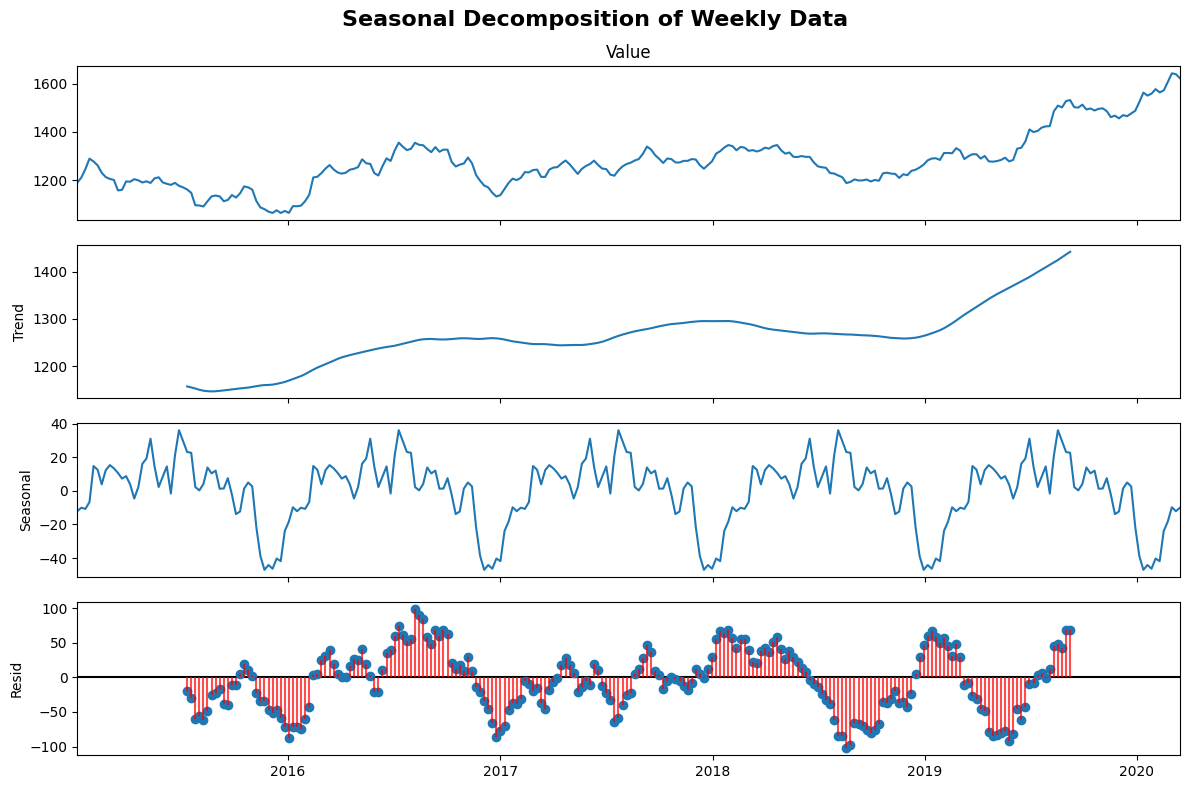

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
result = seasonal_decompose(df_weekly, model='additive', period=54)

# Set figure size
plt.rcParams.update({'figure.figsize': (12, 8)})

# Plot the decomposition components and get the figure and axes
fig = result.plot()
plt.suptitle('Seasonal Decomposition of Weekly Data', fontsize=16, fontweight='bold')

# Get the residual axis (4th subplot)
ax_resid = fig.axes[3]

# Get x values (dates) and residual values (y)
x = df_weekly.index
y = result.resid.values

# Plot vertical lines from residual points down to x-axis (y=0)
for xi, yi in zip(x, y):
    if not np.isnan(yi):
        ax_resid.vlines(x=xi, ymin=0, ymax=yi, colors='red', linestyles='solid', alpha=0.7)

plt.tight_layout()
plt.show()

# **Trend & Residual Component:**

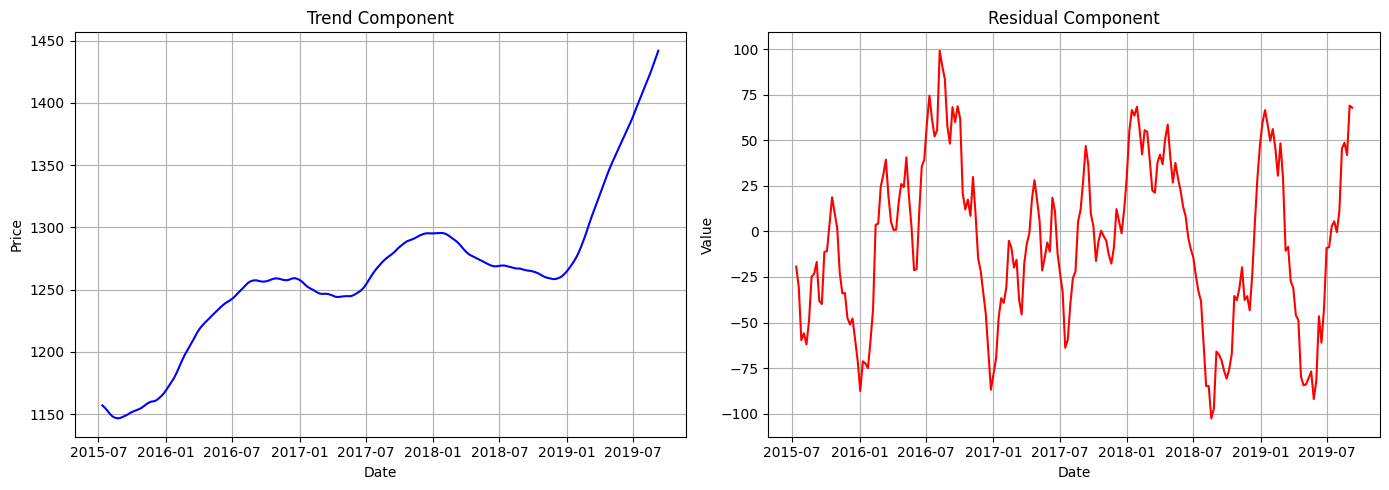

In [ ]:
# Extract trend and residual components
trend = result.trend
residual = result.resid

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot trend
axes[0].plot(trend, color='blue')
axes[0].set_title('Trend Component')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Plot residual
axes[1].plot(residual, color='red')
axes[1].set_title('Residual Component')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# **Differencing and density plot of residual:**

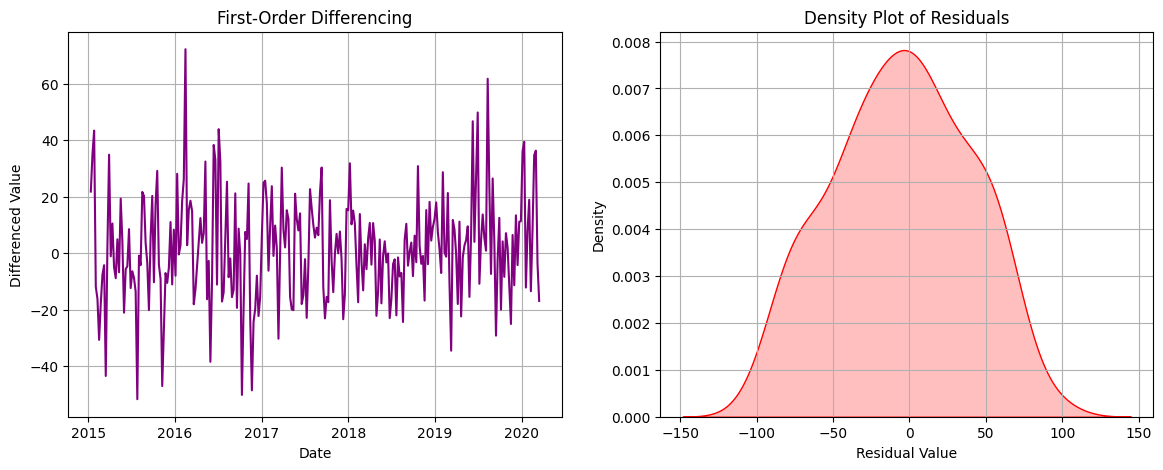

In [ ]:
# First-order differencing
diff_1 = df_weekly.diff()

# Create side-by-side subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot first-order differencing
axes[0].plot(diff_1, color='purple')
axes[0].set_title('First-Order Differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Differenced Value')
axes[0].grid(True)

# Plot residual
import seaborn as sns
sns.kdeplot(residual.dropna(), color='red', fill=True)
plt.title("Density Plot of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

The time series does not seem to be stationary due to presence of a trend. we will eveluate if first differences are sufficient to turn the time series stationary.

# **ADF Statistics:**

In [ ]:
print("Before Differencing:\n-----------------------------")
from statsmodels.tsa.stattools import adfuller
res = adfuller(df_weekly)

print('ADF Statistic:', res[0])
print('p-value:', res[1])


print("\nAfter Differencing:\n-----------------------------")
# Trend decomposition:
diff = list()
for i in range(1, len(df_weekly
                      )):
    value = df_weekly[i] - df_weekly[i - 1]
    diff.append(value)

result = adfuller(diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
#Since the p-value is almost zero, I reject the null hypothesis.
#My differenced series is stationary.
#Therefore, the trend has been successfully removed.

Before Differencing:
-----------------------------
ADF Statistic: -0.15778424031160418
p-value: 0.9433700996880114

After Differencing:
-----------------------------
ADF Statistic: -8.0551140788005
p-value: 1.7007407036919953e-12


# **Autocorrelation Analysis:**

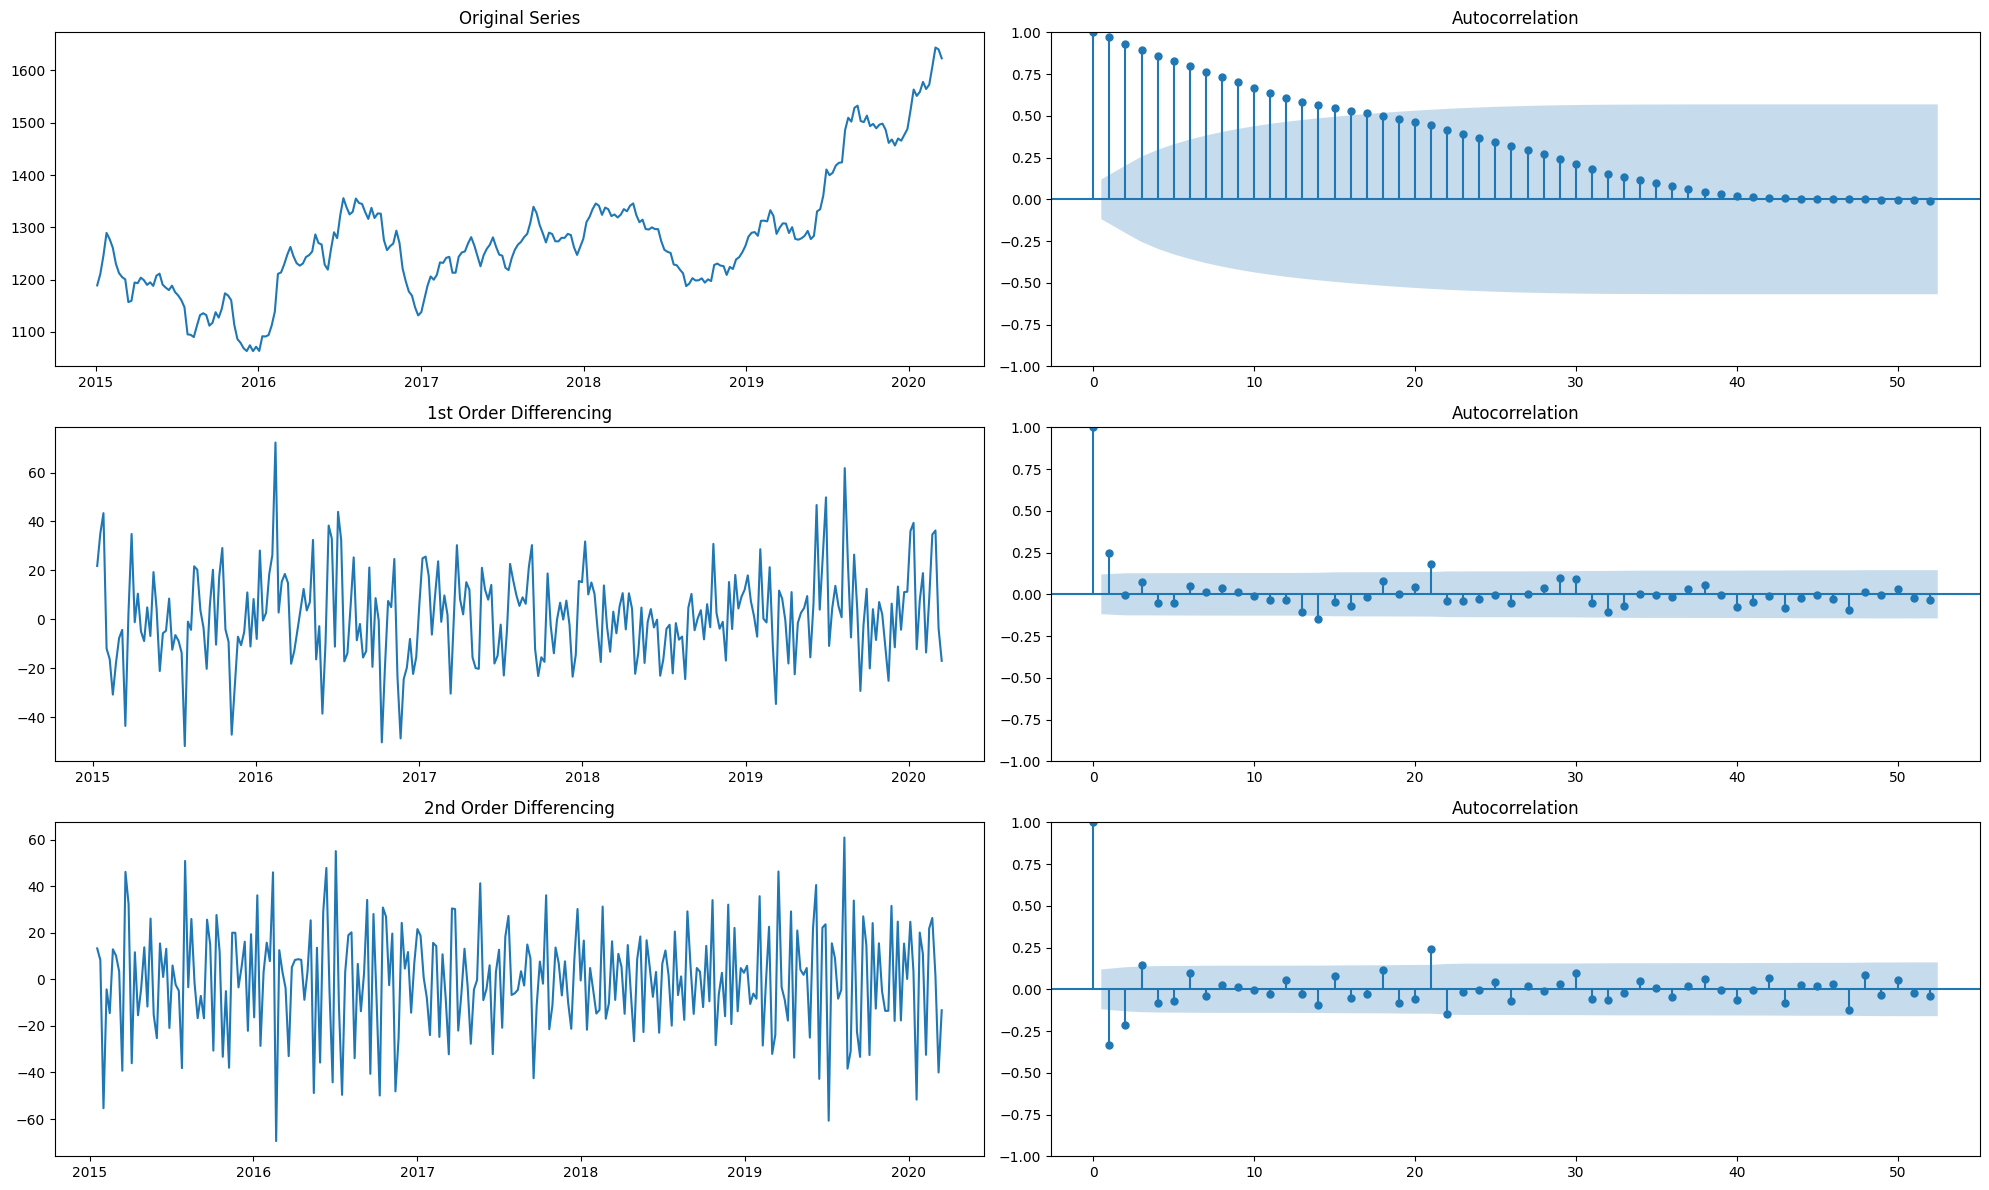

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(3, 2, figsize=(20, 12))

# Original series
axes[0, 0].plot(df_weekly)
axes[0, 0].set_title("Original Series")
plot_acf(df_weekly, ax = axes[0,1],lags=52)

# 1st order differencing
axes[1, 0].plot(df_weekly.diff())
axes[1, 0].set_title("1st Order Differencing")
plot_acf(df_weekly.diff().dropna(), ax=axes[1, 1],lags=52)

# 2nd order differencing
second_diff = df_weekly.diff().diff()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title("2nd Order Differencing")
plot_acf(second_diff.dropna(), ax=axes[2, 1],lags=52)

plt.tight_layout()
plt.show()


#### We noticed how the autocorrelation coefficients slowly decrease as the lag increases, which is a clear indicator that our random walk is not a stationary process. Note that the shaded area represents a confidence interval. If a point is within the shaded area, then it is not significantly different from 0. Otherwise, the autocorrelation coefficient is significant.

# **Partial Autocorrelation Analysis:**

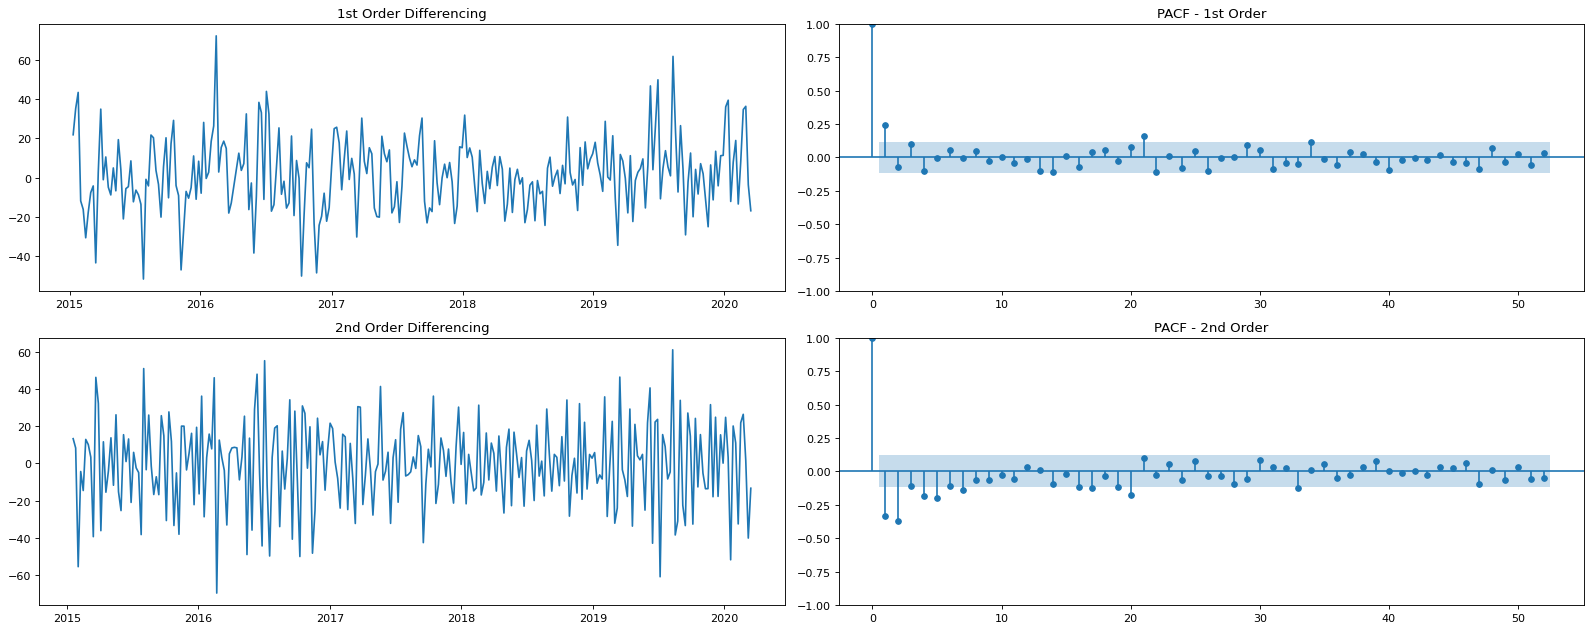

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

plt.rcParams.update({'figure.figsize': (20,8), 'figure.dpi': 80})

fig, axes = plt.subplots(2, 2)  # 3 rows for orders 1, 2, 3

# 1st-order differencing
axes[0, 0].plot(df_weekly.diff().dropna())
axes[0, 0].set_title("1st Order Differencing")
plot_pacf(df_weekly.diff().dropna(), ax=axes[0, 1], method='ywm',lags = 52)
axes[0, 1].set_title("PACF - 1st Order")

# 2nd-order differencing
axes[1, 0].plot(df_weekly.diff().diff().dropna())
axes[1, 0].set_title("2nd Order Differencing")
plot_pacf(df_weekly.diff().diff().dropna(), ax=axes[1, 1], method='ywm',lags = 52)
axes[1, 1].set_title("PACF - 2nd Order")


plt.tight_layout()
plt.show()

In [ ]:
diff_df_weekly = np.diff(df_weekly, n=1)


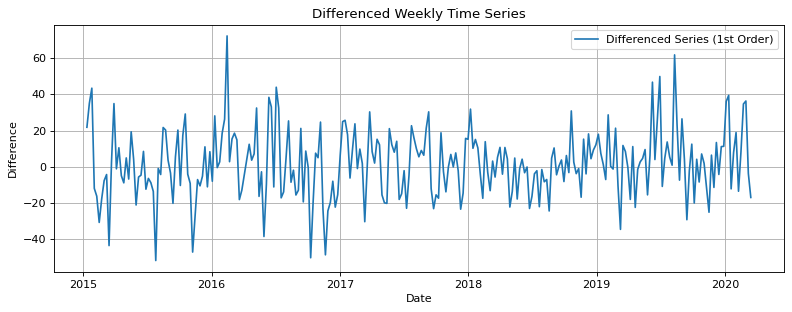

In [ ]:
# Plot the differencing data

# Reconstruct Series (shift index since one value is lost)
diff_series = pd.Series(diff_df_weekly, index=df_weekly.index[1:])

plt.figure(figsize=(10, 4))
plt.plot(diff_series, label='Differenced Series (1st Order)')
plt.title('Differenced Weekly Time Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### we can see that there is no trend and to check further stationarity we will use ADF test

In [ ]:
# ADF test on differenced data
adf_result = adfuller(diff_df_weekly)
print(f'ADF Statistic (1st diff): {adf_result[0]}')
print(f'p-value (1st diff): {adf_result[1]}')

ADF Statistic (1st diff): -8.0551140788005
p-value (1st diff): 1.7007407036919953e-12


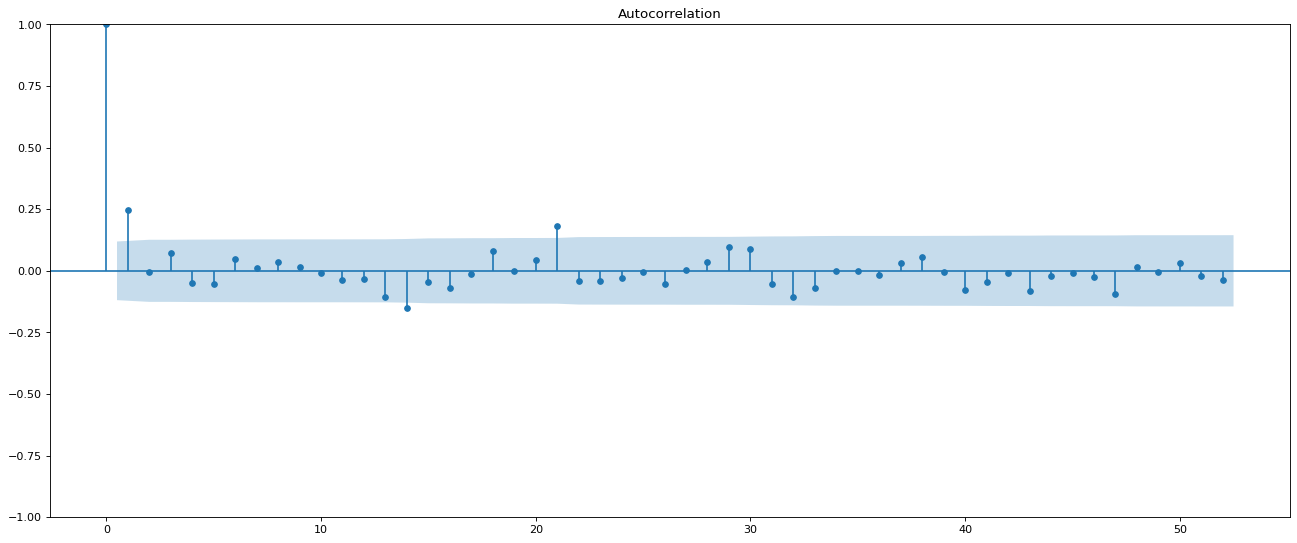

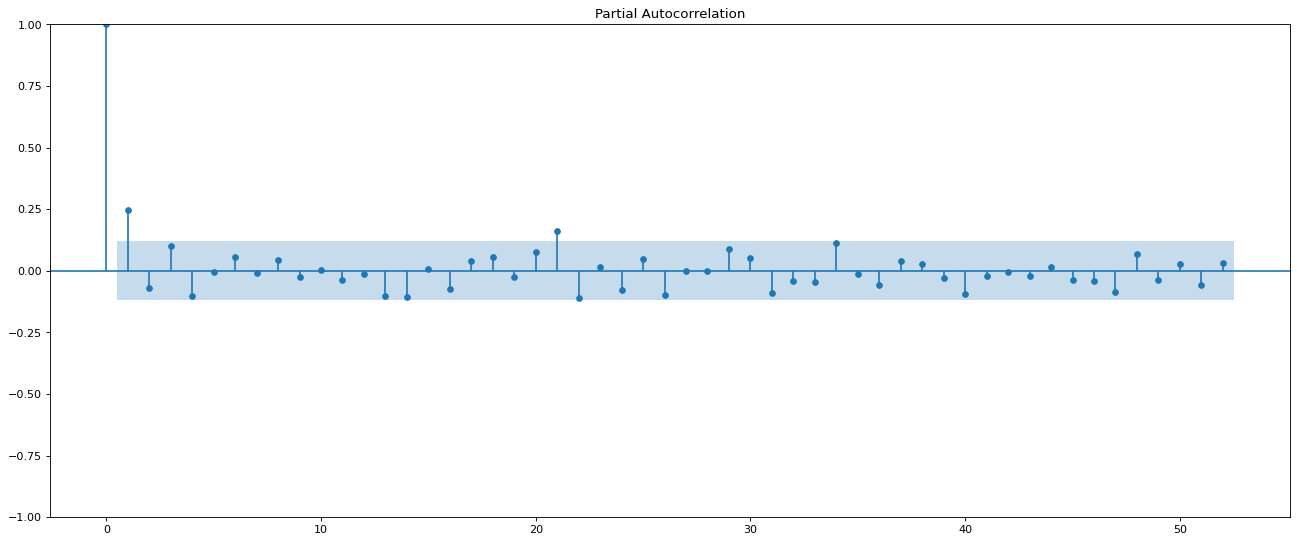

In [ ]:
plot_acf(diff_df_weekly, lags=52)
plt.show()
plot_pacf(diff_df_weekly, lags=52)
plt.show()

#### In ACF plot there are significant spikes after lag 0 so autocorrelation is present in our data that means data is not a random walk. We will use Ljung-Box test to confirm autocorrelation

##**Ljung-Box test:**

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Test multiple lags (e.g., 10, 20, 52)
lb_test = acorr_ljungbox(diff_df_weekly, lags=[10, 20, 52], return_df=True)
print("Ljung-Box Test Results:\n", lb_test)

Ljung-Box Test Results:
       lb_stat  lb_pvalue
10  20.673555   0.023488
20  35.824932   0.016126
52  70.321536   0.046068


since p_value ≤ 0.05: Reject the null hypothesis (significant autocorrelation exists).

# **Train Test Split:**

In [ ]:
# Use the original df_weekly for train-test split
split_index = int(len(df_weekly) * 0.9)
train = df_weekly.iloc[:split_index]
test = df_weekly.iloc[split_index:]


In [ ]:
print(f'No of rows in training dataset: ',train.shape[0])
print(f'No of rows in testing dataset: ',test.shape[0])

No of rows in training dataset:  244
No of rows in testing dataset:  28


# **SARIMA Model:**

Parameters:
```
p: autoregressions order
d: # of differences
q: # of lagged error values
```





In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 52))
sarima_result = sarima_model.fit()

# Forecast the test period length
sarima_forecast = sarima_result.forecast(steps=len(test))

# Convert forecast to Series with test index
sarima_forecast = pd.Series(sarima_forecast, index=test.index)

In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Plot training data
fig.add_trace(go.Scatter(
    x=train.index,
    y=train,
    mode='lines',
    name='📘 Train',
    line=dict(color='#17becf', width=2)
))

# Plot test data
fig.add_trace(go.Scatter(
    x=test.index,
    y=test,
    mode='lines',
    name='🧪 Test (Actual)',
    line=dict(color='#1f77b4', width=2)
))

# Plot SARIMA forecast
fig.add_trace(go.Scatter(
    x=sarima_forecast.index,
    y=sarima_forecast,
    mode='lines',
    name='📊 SARIMA Forecast',
    line=dict(color='#ff7f0e', width=2)
))

# Customize layout
fig.update_layout(
    title='📈 SARIMA Forecast vs Actual',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.6)'),
    width=1000,
    height=500
)

# Show plot
fig.show()


In [ ]:
from sklearn.metrics import root_mean_squared_error

sarima_rmse = root_mean_squared_error(test, sarima_forecast)
print(f'SARIMA RMSE: {sarima_rmse:.4f}')

SARIMA RMSE: 37.4372


In [ ]:
# sarima_model = SARIMAX(train, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52))
# SARIMA RMSE: 38.9439

# sarima_model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(0, 1, 1, 52))
# SARIMA RMSE: 37.4372

# **Visualisation Matrix:**

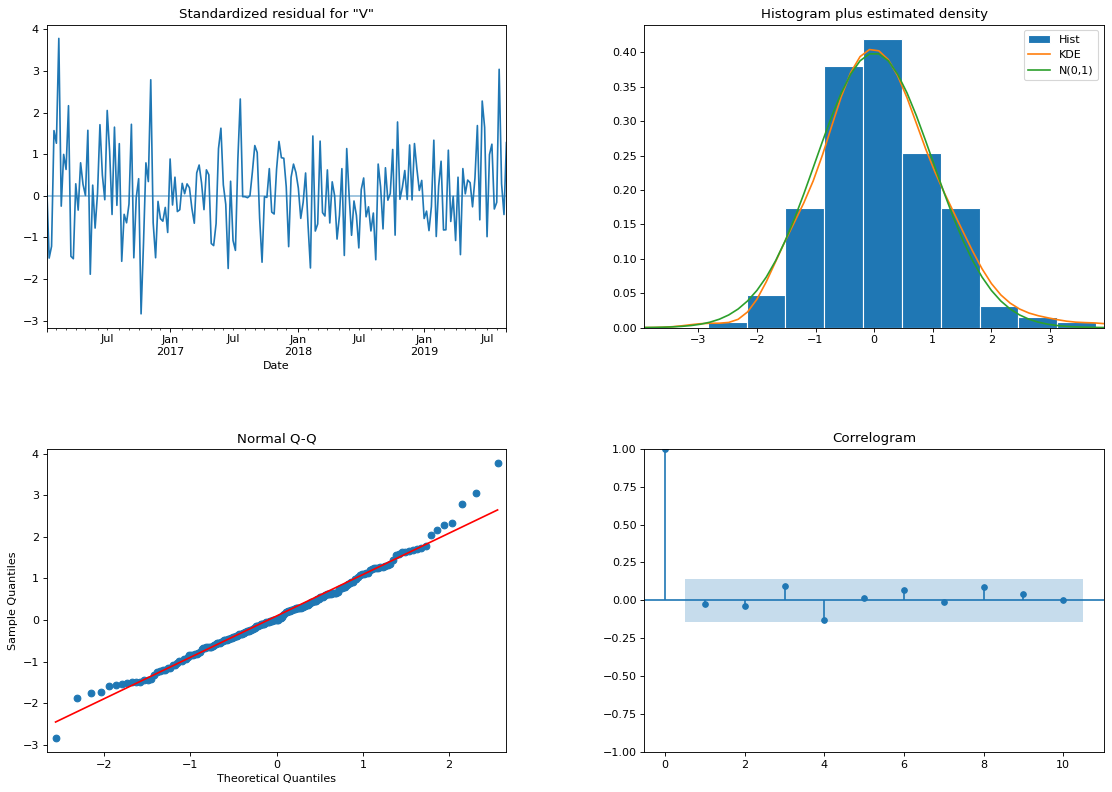

In [ ]:
fig = sarima_result.plot_diagnostics(figsize=(14, 10))

# Improve spacing
plt.tight_layout()

# Optionally adjust subplot spacing manually
plt.subplots_adjust(hspace=0.4, wspace=0.3)

plt.show()

#### We can see that the residuals are almost normally distributed and there is no autocorrelation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate metrics
mae = mean_absolute_error(test, sarima_forecast)
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
mape = np.mean(np.abs((test - sarima_forecast) / test)) * 100

# Nicely formatted output
print("\n📊 **SARIMA Model Forecast Evaluation**\n" + "-"*40)
print(f"🔸 Mean Absolute Error (MAE):       {mae:.2f}")
print(f"🔸 Root Mean Squared Error (RMSE):  {rmse:.2f}")
print(f"🔸 Mean Absolute Percentage Error:  {mape:.2f}%")
print("-"*40)



📊 **SARIMA Model Forecast Evaluation**
----------------------------------------
🔸 Mean Absolute Error (MAE):       29.67
🔸 Root Mean Squared Error (RMSE):  37.44
🔸 Mean Absolute Percentage Error:  1.91%
----------------------------------------


# **Naive Forecast:**

In [ ]:
# Naive forecast (e.g., using last observed value)
naive_forecast = test.shift(1).dropna()
naive_mae = mean_absolute_error(test[1:], naive_forecast)
naive_rmse = np.sqrt(mean_squared_error(test[1:], naive_forecast))
mape = np.mean(np.abs((test - naive_forecast) / test.replace(0, np.nan))) * 100

# Display results
print("\n📊 **Naive Model Forecast Evaluation**\n" + "-"*40)
print(f"🔸 Mean Absolute Error (MAE):       {naive_mae:.2f}")
print(f"🔸 Root Mean Squared Error (RMSE):  {naive_rmse:.2f}")
print(f"🔸 Mean Absolute Percentage Error:  {mape:.2f}%")
print("-"*40)


📊 **Naive Model Forecast Evaluation**
----------------------------------------
🔸 Mean Absolute Error (MAE):       15.11
🔸 Root Mean Squared Error (RMSE):  18.70
🔸 Mean Absolute Percentage Error:  0.98%
----------------------------------------


# **Naive Visualisation:**

In [ ]:
import plotly.graph_objects as go

# Ensure time series alignment
train_end = train.index[-1]
test_start = test.index[0]

# Create the figure
fig = go.Figure()

# Plot training data
fig.add_trace(go.Scatter(
    x=train.index,
    y=train,
    mode='lines',
    name='📘 Train',
    line=dict(color='#17becf', width=2)
))

# Plot actual test data
fig.add_trace(go.Scatter(
    x=test.index,
    y=test,
    mode='lines',
    name='🧪 Test (Actual)',
    line=dict(color='#1f77b4', width=2)
))

# Plot naive forecast (with alignment — note: shifted by 1)
fig.add_trace(go.Scatter(
    x=naive_forecast.index,
    y=naive_forecast,
    mode='lines',
    name='🌀 Naive Forecast (Lag-1)',
    line=dict(color='#ff7f0e', width=2)
))

# Customize layout
fig.update_layout(
    title='🧠 Naive Forecast vs Actual (Train + Test)',
    xaxis_title='Date',
    yaxis_title='Gold Price',
    template='plotly_white',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.6)'),
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


# **Exponential Smoothing:**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model on the training set
model = ExponentialSmoothing(train,
                             trend='add',
                             seasonal='add',
                             seasonal_periods=52
                            )

model_fit = model.fit()

# Forecast for the length of the test set
es_forecast = model_fit.forecast(len(test))

# Evaluate the forecast

mae = mean_absolute_error(test, es_forecast)
rmse = np.sqrt(mean_squared_error(test, es_forecast))
mape = np.mean(np.abs((test - es_forecast) / test)) * 100

# Nicely formatted output
print("\n📊 **Holt-Winters Model Forecast Evaluation**\n" + "-"*40)
print(f"🔸 Mean Absolute Error (MAE):       {mae:.2f}")
print(f"🔸 Root Mean Squared Error (RMSE):  {rmse:.2f}")
print(f"🔸 Mean Absolute Percentage Error:  {mape:.2f}%")
print("-"*40)



📊 **Holt-Winters Model Forecast Evaluation**
----------------------------------------
🔸 Mean Absolute Error (MAE):       28.33
🔸 Root Mean Squared Error (RMSE):  38.49
🔸 Mean Absolute Percentage Error:  1.81%
----------------------------------------


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Train data (Teal)
fig.add_trace(go.Scatter(
    x=train.index,
    y=train,
    mode='lines',
    name='📘 Train',
    line=dict(color='#17becf', width=2)
))

# Test data (Blue)
fig.add_trace(go.Scatter(
    x=test.index,
    y=test,
    mode='lines',
    name='🧪 Test',
    line=dict(color='#1f77b4', width=2)
))

# Forecast (Magenta Pink, dashed)
fig.add_trace(go.Scatter(
    x=test.index,
    y=es_forecast,
    mode='lines',
    name='🔮 Forecast (Holt-Winters)',
    line=dict(color='#e377c2', width=2)
))

# Layout customization
fig.update_layout(
    title='✨ Holt-Winters Forecast vs Actual',
    xaxis_title='Time Index',
    yaxis_title='Gold Price',
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255,255,255,0.6)'),
    template='plotly_white',
    width=1000,
    height=500
)

# Show interactive plot
fig.show()


# **LSTM:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale gold prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df["Value"].values.reshape(-1, 1))  # df is your gold price DataFrame

# Create sequences (e.g., past 30 days → next day)
def create_sequences(data, seq_len=30):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 7
X, y = create_sequences(scaled_data, seq_len)

# Train-test split
split_index = int(len(X) * 0.9)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:
#!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(seq_len, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0316 - val_loss: 0.0149
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 9.5468e-04
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 9/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 10/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 11/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 12/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss:

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Inverse transform all components
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

# Build time index (for x-axis)
total_points = len(y_train_inv) + len(y_test_inv)
time_index = np.arange(total_points)

# Pad forecast with NaNs to align with test period
forecast_series = np.concatenate([np.full_like(y_train_inv, np.nan), y_pred_inv])

# Create interactive Plotly figure
fig = go.Figure()

# Actual values (train + test)
fig.add_trace(go.Scatter(
    x=time_index,
    y=np.concatenate([y_train_inv, y_test_inv]).flatten(),
    mode='lines',
    name='📈 Actual (Train + Test)',
    line=dict(color='#17becf')
))

# Forecasted values
fig.add_trace(go.Scatter(
    x=time_index,
    y=forecast_series.flatten(),
    mode='lines',
    name='🤖 Forecast (LSTM)',
    line=dict(color='#e377c2')
))

# Add vertical line for train/test split
fig.add_vline(
    x=len(y_train_inv),
    line=dict(color='blue', dash='dot'),
    annotation_text='Train/Test Split',
    annotation_position="top right"
)

# Customize layout
fig.update_layout(
    title='📊 Gold Price Forecasting with LSTM',
    xaxis_title='Time Step',
    yaxis_title='Gold Price',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    width=1000,
    height=500
)

# Show the interactive plot
fig.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = root_mean_squared_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

# Nicely formatted output
print("\n📊 **LSTM Model Forecast Evaluation**\n" + "-"*40)
print(f"🔸 Mean Absolute Error (MAE):       {mae:.2f}")
print(f"🔸 Root Mean Squared Error (RMSE):  {rmse:.2f}")
print(f"🔸 Mean Absolute Percentage Error:  {mape:.2f}%")
print("-"*40)



📊 **LSTM Model Forecast Evaluation**
----------------------------------------
🔸 Mean Absolute Error (MAE):       21.99
🔸 Root Mean Squared Error (RMSE):  28.12
🔸 Mean Absolute Percentage Error:  1.41%
----------------------------------------


# **Overall Conclusion:**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Desired order
models = ["Naive", "LSTM", "Holt-Winters", "SARIMA"]

# Corresponding metrics in the same order
mae = [15.11, 21.99, 28.33, 29.67]
rmse = [18.70, 28.12, 38.49, 37.44]
mape = [0.98, 1.41, 1.81, 1.91]

# Create DataFrame
df = pd.DataFrame({
    "Model": models,
    "MAE": [round(val, 2) for val in mae],
    "RMSE": [round(val, 2) for val in rmse],
    "MAPE (%)": [round(val, 2) for val in mape]
})

# Create subplot
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.58, 0.42],
    specs=[[{"type": "table"}, {"type": "xy"}]]
)

# Table
fig.add_trace(go.Table(
    header=dict(
        values=["<b>Model</b>", "<b>MAE</b>", "<b>RMSE</b>", "<b>MAPE (%)</b>"],
        fill_color='darkcyan',
        font=dict(color='white', size=14),
        align='center',
        line_color='black'
    ),
    cells=dict(
        values=[df[col] for col in df.columns],
        fill_color=[['#F0FFFF', 'white'] * 2],
        align='center',
        font=dict(color='black', size=12),
        line_color='black'
    )
), row=1, col=1)

# Bar chart
metrics = ['MAE', 'RMSE', 'MAPE (%)']
colors = ['darkcyan', 'mediumvioletred', 'darkorange']
values = [mae, rmse, mape]

for metric, color, val in zip(metrics, colors, values):
    fig.add_trace(go.Bar(
        x=models,
        y=val,
        name=metric,
        marker_color=color,
        text=[f"{v:.2f}" for v in val],
        textposition='outside',
        hovertemplate=f"<b>%{{x}}</b><br>{metric}: %{{y:.2f}}<extra></extra>"
    ), row=1, col=2)

fig.update_layout(
    title="📊 Forecasting Models: Performance & Statistical Significance",
    barmode='group',
    template='plotly_white',
    width=1100,
    height=500,
    legend=dict(title='Metric', x=0.56, y=1.1, orientation='h'),
    margin=dict(l=20, r=20, t=60, b=20),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.update_yaxes(title_text="Error Metric Value", row=1, col=2)

fig.show()
